In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/synprivutil-main

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/synprivutil-main


In [ ]:
!pip install numpy==1.26.4 pandas==2.2.2 sdv==1.15.0 scikit-learn==1.5.1 seaborn==0.12.2 matplotlib==3.9.2 rdt==1.12.3 anonymeter==1.0.0 scipy==1.13.0 dython==0.7.8 POT==0.9.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.

## ML utility

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Tabula_Workflow_Improved_Diagram.png'

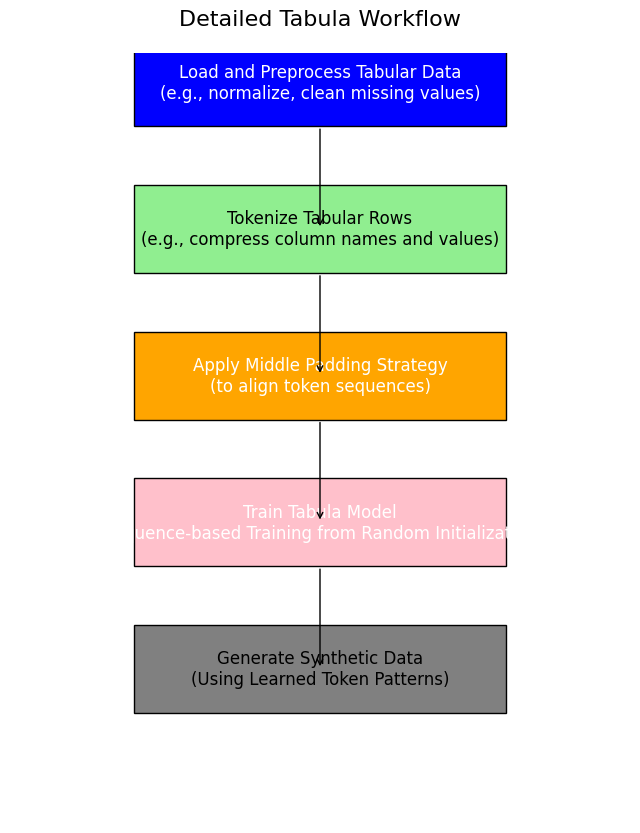

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create graphs and axes
fig, ax = plt.subplots(figsize=(8, 10))

# Flowchart Steps & Colours
process_steps = [
    ("Load and Preprocess Tabular Data\n(e.g., normalize, clean missing values)", "blue"),
    ("Tokenize Tabular Rows\n(e.g., compress column names and values)", "lightgreen"),
    ("Apply Middle Padding Strategy\n(to align token sequences)", "orange"),
    ("Train Tabula Model\n(Sequence-based Training from Random Initialization)", "pink"),
    ("Generate Synthetic Data\n(Using Learned Token Patterns)", "gray")
]

# Parameter
y_start = 0.95
rect_width = 0.6
rect_height = 0.12
gap = 0.08

# Metrics & Text
y_positions = []
for i, (text, color) in enumerate(process_steps):
    y_pos = y_start - i * (rect_height + gap)
    y_positions.append(y_pos)
    ax.add_patch(Rectangle((0.2, y_pos), rect_width, rect_height, edgecolor='black', facecolor=color))
    ax.text(0.5, y_pos + rect_height / 2, text, fontsize=12, ha='center', va='center', color="white" if color not in ["lightgreen", "gray"] else "black")

# Add Arrows
for i in range(len(y_positions) - 1):
    start_y = y_positions[i]
    end_y = y_positions[i + 1] + rect_height / 2
    ax.annotate("", xy=(0.5, end_y), xytext=(0.5, start_y),
                arrowprops=dict(arrowstyle="->", color="black"))

# Adjust graphic borders and titles
ax.set_xlim(0, 1)
ax.set_ylim(0, y_start + 0.1)
ax.axis('off')
plt.title("Detailed Tabula Workflow", fontsize=16, pad=20)

# Display
plt.savefig('/mnt/data/Tabula_Workflow_Improved_Diagram.png')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

def calculate_ml_utility_classification(original, synthetic, target_column):
    """
    Evaluate machine learning utility by linking synthetic data to original data
    using classification models and calculating average F1 score and accuracy.

    Parameters:
        original (pd.DataFrame): Original dataset.
        synthetic (pd.DataFrame): Synthetic dataset.
        target_column (str): The target column for classification.

    Returns:
        dict: Average F1 score and accuracy for STO scenario across multiple classifiers.
    """
    # Step 1: Prepare original data
    X_test_orig = original.drop(columns=[target_column])
    y_test_orig = original[target_column]

    # Step 2: Prepare synthetic data
    X_syn = synthetic.drop(columns=[target_column])
    y_syn = synthetic[target_column]

    # Classification models
    models = [RandomForestClassifier(), GradientBoostingClassifier()]

    # Collect scores for STO (Train on Synthetic, Test on Original)
    sto_f1_list = []
    sto_accuracy_list = []

    for model in models:
        # Train on synthetic data, test on original data
        model.fit(X_syn, y_syn)
        y_pred_syn_on_orig = model.predict(X_test_orig)

        # Calculate F1 score and accuracy
        sto_f1 = f1_score(y_test_orig, y_pred_syn_on_orig, average='weighted')
        sto_accuracy = accuracy_score(y_test_orig, y_pred_syn_on_orig)

        sto_f1_list.append(sto_f1)
        sto_accuracy_list.append(sto_accuracy)

    # Average scores
    avg_sto_f1 = np.mean(sto_f1_list)
    avg_sto_accuracy = np.mean(sto_accuracy_list)

    metrics = {
        "F1_syn": avg_sto_f1,  # Train on synthetic, test on original
        "Accuracy_syn": avg_sto_accuracy  # Train on synthetic, test on original
    }

    return metrics


In [ ]:
def replace_outliers_with_mean(original_data, synthetic_data, threshold=1):

    for column in synthetic_data.columns:
        if column in original_data.columns:
            # Use max and min with std range to determine abnormal value
            orig_mean = original_data[column].median()
            orig_max = original_data[column].max()
            orig_min = original_data[column].min()
            orig_std = original_data[column].std()

            lower_bound = orig_min - threshold * orig_std
            upper_bound = orig_max + threshold * orig_std

            synthetic_data[column] = synthetic_data[column].apply(
                lambda x: orig_mean if x < lower_bound or x > upper_bound else x
            )
            # print(f"Column '{column}': replaced outliers outside [{lower_bound}, {upper_bound}] with mean ({orig_mean}).")

    return synthetic_data

def remove_rows_with_outliers(original_data, synthetic_data, synthetic_name, threshold=1):
    """
    删除 synthetic_data 中包含异常值的整行。

    Parameters:
        original_data (pd.DataFrame): 原始数据。
        synthetic_data (pd.DataFrame): 合成数据。
        synthetic_name (str): 数据集名称（用于输出调试信息）。
        threshold (float): 异常值判断的倍数阈值。

    Returns:
        pd.DataFrame: 删除异常值后的合成数据。
    """
    # Initialise the set of row indexes to be deleted
    rows_to_drop = set()

    for column in synthetic_data.columns:
        if column in original_data.columns:
            # Range based on raw data
            orig_mean = original_data[column].median()
            orig_max = original_data[column].max()
            orig_min = original_data[column].min()
            orig_std = original_data[column].std()

            lower_bound = orig_min - threshold * orig_std
            upper_bound = orig_max + threshold * orig_std

            # Find outlier
            outlier_indices = synthetic_data[(synthetic_data[column] < lower_bound) |
                                             (synthetic_data[column] > upper_bound)].index
            rows_to_drop.update(outlier_indices)

            # Output debug information (optional)
            # print(f"Column '{column}': found {len(outlier_indices)} rows with outliers outside [{lower_bound}, {upper_bound}].")

    # Delete outlier
    rows_to_drop = list(rows_to_drop)  
    cleaned_data = synthetic_data.drop(index=rows_to_drop)

    print(f"Under {synthetic_name}, removed {len(rows_to_drop)} rows with outliers.")
    return cleaned_data

In [ ]:
import os
import re
import gc
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/abalone_number.csv")
original_name = "abalone"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/abalone_syn_data"

# Dictionary to store aggregated results
aggregated_results = defaultdict(lambda: defaultdict(list))

# Function to extract sigma value as float
def extract_sigma(file_name):
    match = re.search(r"sigma-(\d+)", file_name)
    if match:
        sigma_str = match.group(1)
        if len(sigma_str) == 1:  # Single digit like "1" -> "1"
            return int(sigma_str)
        elif len(sigma_str) == 2:  # Two digits like "05" -> "0.5"
            return int(sigma_str) / 10
        elif len(sigma_str) == 3:  # Three digits like "005" -> "0.05"
            return int(sigma_str) / 100
    return None

target_column = "rings"  # Replace with your actual target column
task_type = "classification"  # "classification" or "regression"

# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)

        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        for column in synthetic_data.columns:
            if column in original_data.columns:
                # Convert the column type in synthetic data to match the original data
                synthetic_data[column] = synthetic_data[column].astype(original_data[column].dtype)

        synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)
        # synthetic_data = remove_rows_with_outliers(original_data, synthetic_data, file_name)
        sigma = extract_sigma(file_name)
        if sigma is None:
            continue  # Skip files without a valid sigma value
        # print(f"\nProcessing synthetic dataset: {file_name} (sigma: {sigma})")

        # Step 1: Calculate ML utility
        ml_results = calculate_ml_utility_classification(original_data, synthetic_data, target_column)

        # Step 2: Add metrics to aggregated_results
        for category, metric_value in ml_results.items():
            aggregated_results[sigma][category].append(metric_value)

        # Cleanup
        del synthetic_data
        gc.collect()



# Step 3: Calculate average metrics for each sigma
averaged_results = defaultdict(dict)
for sigma, metrics in aggregated_results.items():
    for metric, values in metrics.items():
        averaged_results[sigma][metric] = np.mean(values)

# Step 4: Convert averaged_results into a DataFrame
final_results = defaultdict(list)
for sigma, metrics in averaged_results.items():
    final_results["sigma"].append(sigma)
    for metric, value in metrics.items():
        final_results[metric].append(value)

df = pd.DataFrame(final_results)

# Sort the DataFrame by sigma
df = df.sort_values(by="sigma").reset_index(drop=True)

# Step 5: Print and verify the DataFrame
print(df)


    sigma    F1_syn  Accuracy_syn
0    0.00  0.024342      0.037587
1    0.01  0.004725      0.011851
2    0.02  0.075271      0.099593
3    0.03  0.005046      0.003471
4    0.04  0.003269      0.004668
5    0.05  0.033682      0.037108
6    0.10  0.008347      0.007781
7    0.15  0.041827      0.074934
8    0.20  0.001914      0.011013
9    0.25  0.052949      0.055901
10   0.30  0.003328      0.010773
11   0.35  0.095125      0.135863


## Privacy and utility evaluations

### original

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator, AdversarialAccuracyCalculator_NN
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.disco import DisclosureCalculator

# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/abalone_number.csv")
original_name = "abalone"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/abalone_syn_data"

# Dictionary to store aggregated results
aggregated_results = defaultdict(lambda: defaultdict(list))

# Function to extract sigma value as float
def extract_sigma(file_name):
    match = re.search(r"sigma-(\d+)", file_name)
    if match:
        sigma_str = match.group(1)
        if len(sigma_str) == 1:  # Single digit like "1" -> "1"
            return int(sigma_str)
        elif len(sigma_str) == 2:  # Two digits like "05" -> "0.5"
            return int(sigma_str) / 10
        elif len(sigma_str) == 3:  # Three digits like "005" -> "0.05"
            return int(sigma_str) / 100
    return None


# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)
        # synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)
        # synthetic_data = remove_rows_with_outliers(original_data, synthetic_data, file_name)
        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        # if 'Glucose' in synthetic_data.columns:
        #     synthetic_data['Glucose'] = synthetic_data['Glucose'].astype(int)
        # if 'BloodPressure' in synthetic_data.columns:
        #     synthetic_data['BloodPressure'] = synthetic_data['BloodPressure'].astype(int)
        for column in synthetic_data.columns:
            if column in original_data.columns:
                # Convert the column type in synthetic data to match the original data
                synthetic_data[column] = synthetic_data[column].astype(original_data[column].dtype)


        sigma = extract_sigma(file_name)
        if sigma is None:
            continue  # Skip files without a valid sigma value
        # print(f"\nProcessing synthetic dataset: {file_name} (sigma: {sigma})")

        # Utility Metric Calculation
        u = UtilityMetricManager()
        utility_metric_list = [
            BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        u.add_metric(utility_metric_list)
        results_utility = u.evaluate_all()

        # Privacy Metric Calculation
        p = PrivacyMetricManager()
        privacy_metric_list = [
            DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        p.add_metric(privacy_metric_list)
        results_privacy = p.evaluate_all()

        # # DiSCO and repU
        diabetes_keys = ['sex', 'length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight']
        diabetes_target = 'rings'  # 通常 Age 被用作目标变量，也可能根据具体需求选择其他

        calc = DisclosureCalculator(original_data, synthetic_data, keys=diabetes_keys, target=diabetes_target)
        repU, DiSCO = calc.evaluate()

        # Aggregate metrics
        for key, value in {**results_utility, **results_privacy}.items():
            aggregated_results[sigma][key].append(value)


        aggregated_results[sigma]["Disclosure_repU"].append(repU)
        aggregated_results[sigma]["Disclosure_DiSCO"].append(DiSCO)

# Calculate average metrics for each sigma
averaged_results = defaultdict(dict)
for sigma, metrics in aggregated_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):
            averaged_results[sigma][metric] = {k: np.mean([v[k] for v in values]) for k in values[0]}
        else:
            averaged_results[sigma][metric] = np.mean(values)

Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 18.62it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7413 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.32it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7421 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 16.90it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7407 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 15.63it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7398 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 16.64it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7399 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 16.48it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7287 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 15.62it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7235 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.84it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7139 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 19.57it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7028 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 18.00it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7008 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.92it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 6893 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 26.08it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7431 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~


In [ ]:
# Clean up averaged_results to extract metric names without file details
cleaned_results = defaultdict(dict)

for sigma, metrics in averaged_results.items():
    for metric, value in metrics.items():
        # Extract only the metric name, ignoring dataset/file info
        metric_name = metric.split("(")[0]
        if metric_name not in cleaned_results[sigma]:
            cleaned_results[sigma][metric_name] = []
        cleaned_results[sigma][metric_name].append(value)

# Aggregate and calculate average values for cleaned results
final_results = defaultdict(dict)
for sigma, metrics in cleaned_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):  # If metric value is a dictionary
            # Average each key in the dictionary
            final_results[sigma][metric] = {k: sum(v[k] for v in values) / len(values) for k in values[0]}
        else:  # If metric value is a list of scalars
            final_results[sigma][metric] = sum(values) / len(values)

# Prepare data for plotting
data = {
    "sigma": sorted(final_results.keys()),
    "DCR": [final_results[sigma].get("DCRCalculator", None) for sigma in sorted(final_results.keys())],
    "NNDR": [final_results[sigma].get("NNDRCalculator", None) for sigma in sorted(final_results.keys())],
    # "AdversarialAccuracy": [final_results[sigma].get("AdversarialAccuracyCalculator", None) for sigma in sorted(final_results.keys())],
    "NNAA": [final_results[sigma].get("AdversarialAccuracyCalculator_NN", None) for sigma in sorted(final_results.keys())],
    "Correlation": [final_results[sigma].get("CorrelationCalculator", None) for sigma in sorted(final_results.keys())],
    "JS": [final_results[sigma].get("JSCalculator", None) for sigma in sorted(final_results.keys())],
    "repU": [final_results[sigma].get("Disclosure_repU", None) for sigma in sorted(final_results.keys())],
    "DiSCO": [final_results[sigma].get("Disclosure_DiSCO", None) for sigma in sorted(final_results.keys())],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Verify DataFrame content
print(df)


    sigma        DCR      NNDR      NNAA  Correlation        JS  repU  DiSCO
0    0.00   0.110411  0.870129  0.887740     0.893272  0.666937   0.0    0.0
1    0.01   0.193386  0.924043  0.949034     0.808146  0.768261   0.0    0.0
2    0.02   0.493751  0.948726  0.939551     0.741505  0.850342   0.0    0.0
3    0.03   0.378795  0.950268  0.982134     0.730860  0.767444   0.0    0.0
4    0.04   0.465433  0.960848  0.985861     0.712987  0.716698   0.0    0.0
5    0.05   0.746506  0.959328  0.984433     0.694259  0.702413   0.0    0.0
6    0.10   0.626182  0.958794  0.992406     0.679352  0.638055   0.0    0.0
7    0.15   0.676452  0.963530  0.988686     0.676271  0.649849   0.0    0.0
8    0.20  11.376226  0.972292  0.993177     0.675022  0.618282   0.0    0.0
9    0.25   0.729101  0.963348  0.990290     0.677041  0.667457   0.0    0.0
10   0.30   0.788964  0.971349  0.993402     0.673881  0.617791   0.0    0.0
11   0.35   1.037389  0.963605  0.990004     0.675661  0.668642   0.0    0.0

In [ ]:
# Extract BasicStatsCalculator's mean、median、var
basic_stats_data = {
    "sigma": [],
    "mean": [],
    "median": [],
    "var": []
}

for sigma, metrics in final_results.items():
    if "BasicStatsCalculator" in metrics:
        basic_stats = metrics["BasicStatsCalculator"]
        basic_stats_data["sigma"].append(sigma)
        basic_stats_data["mean"].append(basic_stats["mean"])
        basic_stats_data["median"].append(basic_stats["median"])
        basic_stats_data["var"].append(basic_stats["var"])

# Transfer to DataFrame
basic_stats_df = pd.DataFrame(basic_stats_data)

# Display
print(basic_stats_df)


    sigma      mean    median           var
0    0.01  0.071225  0.067597      0.009968
1    0.02  0.038539  0.026931     22.819532
2    0.03  0.041647  0.068232      0.027648
3    0.04  0.077626  0.086801      0.029910
4    0.05  0.080356  0.073916     20.301473
5    0.10  0.121355  0.148280      0.073820
6    0.15  0.123462  0.130410      0.137267
7    0.20  1.329127  0.166338  37036.815991
8    0.25  0.132913  0.133880      0.361320
9    0.30  0.144590  0.168882      0.494280
10   0.35  0.110489  0.131744      8.880156
11   0.00  0.108624  0.098054      0.017014


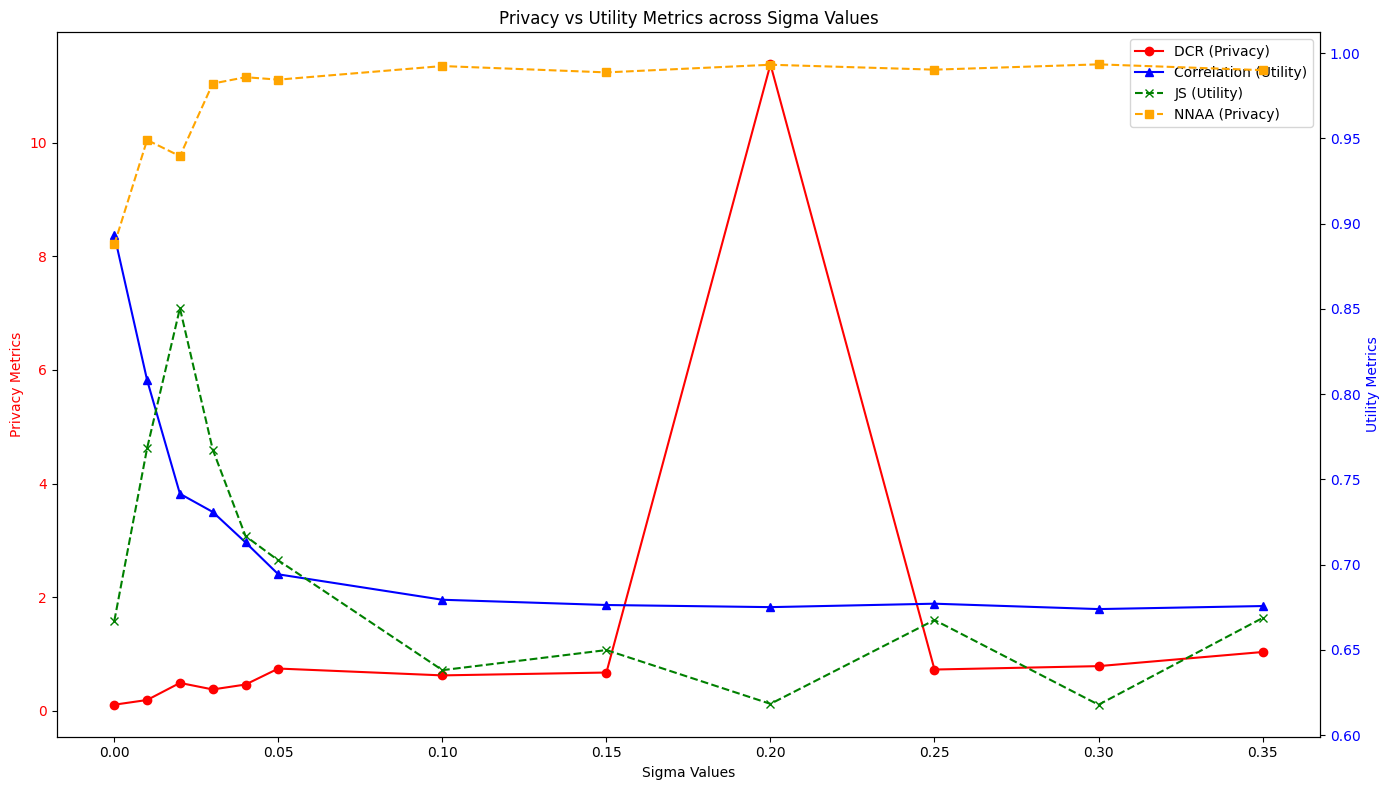

In [ ]:
import matplotlib.pyplot as plt

# Data set name (corresponding to sigma value)
datasets = df["sigma"]

# DCR
DCR = df["DCR"]
adversarial_accuracy = df["NNAA"]

# Correlation
correlation = df["Correlation"]
JS = df["JS"]

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Draw DCR
ax1.plot(datasets, DCR, marker='o', color='red', label="DCR (Privacy)", linestyle='-')
ax1.set_xlabel("Sigma Values")
ax1.set_ylabel("Privacy Metrics", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Draw Correlation
ax2 = ax1.twinx()
ax2.plot(datasets, correlation, marker='^', color='blue', label="Correlation (Utility)", linestyle='-')
ax2.plot(datasets, JS, marker='x', color='green', label="JS (Utility)", linestyle='--')
ax2.plot(datasets, adversarial_accuracy, marker='s', color='orange', label="NNAA (Privacy)", linestyle='--')
ax2.set_ylabel("Utility Metrics", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Add title and labels
plt.title("Privacy vs Utility Metrics across Sigma Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### replace

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator, AdversarialAccuracyCalculator_NN
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.disco import DisclosureCalculator

# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/abalone_number.csv")
original_name = "abalone"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/abalone_syn_data"

# Dictionary to store aggregated results
aggregated_results = defaultdict(lambda: defaultdict(list))

# Function to extract sigma value as float
def extract_sigma(file_name):
    match = re.search(r"sigma-(\d+)", file_name)
    if match:
        sigma_str = match.group(1)
        if len(sigma_str) == 1:  # Single digit like "1" -> "1"
            return int(sigma_str)
        elif len(sigma_str) == 2:  # Two digits like "05" -> "0.5"
            return int(sigma_str) / 10
        elif len(sigma_str) == 3:  # Three digits like "005" -> "0.05"
            return int(sigma_str) / 100
    return None


# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)
        synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)
        # synthetic_data = remove_rows_with_outliers(original_data, synthetic_data, file_name)
        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        # if 'Glucose' in synthetic_data.columns:
        #     synthetic_data['Glucose'] = synthetic_data['Glucose'].astype(int)
        # if 'BloodPressure' in synthetic_data.columns:
        #     synthetic_data['BloodPressure'] = synthetic_data['BloodPressure'].astype(int)
        for column in synthetic_data.columns:
            if column in original_data.columns:
                # Convert the column type in synthetic data to match the original data
                synthetic_data[column] = synthetic_data[column].astype(original_data[column].dtype)


        sigma = extract_sigma(file_name)
        if sigma is None:
            continue  # Skip files without a valid sigma value
        # print(f"\nProcessing synthetic dataset: {file_name} (sigma: {sigma})")

        # Utility Metric Calculation
        u = UtilityMetricManager()
        utility_metric_list = [
            BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        u.add_metric(utility_metric_list)
        results_utility = u.evaluate_all()

        # Privacy Metric Calculation
        p = PrivacyMetricManager()
        privacy_metric_list = [
            DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        p.add_metric(privacy_metric_list)
        results_privacy = p.evaluate_all()

        # # DiSCO and repU
        diabetes_keys = ['sex', 'length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight']
        diabetes_target = 'rings'  # Usually Age is used as the target variable, but other variables may be selected depending on specific needs.

        calc = DisclosureCalculator(original_data, synthetic_data, keys=diabetes_keys, target=diabetes_target)
        repU, DiSCO = calc.evaluate()

        # Aggregate metrics
        for key, value in {**results_utility, **results_privacy}.items():
            aggregated_results[sigma][key].append(value)


        aggregated_results[sigma]["Disclosure_repU"].append(repU)
        aggregated_results[sigma]["Disclosure_DiSCO"].append(DiSCO)

# Calculate average metrics for each sigma
averaged_results = defaultdict(dict)
for sigma, metrics in aggregated_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):
            averaged_results[sigma][metric] = {k: np.mean([v[k] for v in values]) for k in values[0]}
        else:
            averaged_results[sigma][metric] = np.mean(values)

Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 20.95it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7413 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.11it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7421 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 16.71it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7407 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 15.99it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7398 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.08it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7399 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 20.31it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7287 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 19.35it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7235 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 15.62it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7139 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 18.03it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7028 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.97it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7008 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 20.73it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 6893 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 26.77it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7431 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~


In [ ]:
# Clean up averaged_results to extract metric names without file details
cleaned_results = defaultdict(dict)

for sigma, metrics in averaged_results.items():
    for metric, value in metrics.items():
        # Extract only the metric name, ignoring dataset/file info
        metric_name = metric.split("(")[0]
        if metric_name not in cleaned_results[sigma]:
            cleaned_results[sigma][metric_name] = []
        cleaned_results[sigma][metric_name].append(value)

# Aggregate and calculate average values for cleaned results
final_results = defaultdict(dict)
for sigma, metrics in cleaned_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):  # If metric value is a dictionary
            # Average each key in the dictionary
            final_results[sigma][metric] = {k: sum(v[k] for v in values) / len(values) for k in values[0]}
        else:  # If metric value is a list of scalars
            final_results[sigma][metric] = sum(values) / len(values)

# Prepare data for plotting
data = {
    "sigma": sorted(final_results.keys()),
    "DCR": [final_results[sigma].get("DCRCalculator", None) for sigma in sorted(final_results.keys())],
    "NNDR": [final_results[sigma].get("NNDRCalculator", None) for sigma in sorted(final_results.keys())],
    # "AdversarialAccuracy": [final_results[sigma].get("AdversarialAccuracyCalculator", None) for sigma in sorted(final_results.keys())],
    "NNAA": [final_results[sigma].get("AdversarialAccuracyCalculator_NN", None) for sigma in sorted(final_results.keys())],
    "Correlation": [final_results[sigma].get("CorrelationCalculator", None) for sigma in sorted(final_results.keys())],
    "JS": [final_results[sigma].get("JSCalculator", None) for sigma in sorted(final_results.keys())],
    "repU": [final_results[sigma].get("Disclosure_repU", None) for sigma in sorted(final_results.keys())],
    "DiSCO": [final_results[sigma].get("Disclosure_DiSCO", None) for sigma in sorted(final_results.keys())],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Verify DataFrame content
print(df)


    sigma       DCR      NNDR      NNAA  Correlation        JS  repU  DiSCO
0    0.00  0.110324  0.870158  0.887894     0.893486  0.666781   0.0    0.0
1    0.01  0.190041  0.923944  0.948880     0.814783  0.768715   0.0    0.0
2    0.02  0.235974  0.948656  0.940322     0.782137  0.852274   0.0    0.0
3    0.03  0.361245  0.949945  0.982289     0.733238  0.770486   0.0    0.0
4    0.04  0.433854  0.960159  0.986052     0.713238  0.721038   0.0    0.0
5    0.05  0.462035  0.958177  0.984278     0.707374  0.707790   0.0    0.0
6    0.10  0.554608  0.957325  0.991763     0.680392  0.645023   0.0    0.0
7    0.15  0.565579  0.961640  0.988523     0.678360  0.656207   0.0    0.0
8    0.20  0.597816  0.971388  0.992333     0.677932  0.625588   0.0    0.0
9    0.25  0.553779  0.961959  0.990115     0.678055  0.674705   0.0    0.0
10   0.30  0.608627  0.970127  0.992873     0.676299  0.625293   0.0    0.0
11   0.35  0.562147  0.962233  0.990188     0.675555  0.677254   0.0    0.0


In [ ]:
# Extract BasicStatsCalculator's mean、median、var
basic_stats_data = {
    "sigma": [],
    "mean": [],
    "median": [],
    "var": []
}

for sigma, metrics in final_results.items():
    if "BasicStatsCalculator" in metrics:
        basic_stats = metrics["BasicStatsCalculator"]
        basic_stats_data["sigma"].append(sigma)
        basic_stats_data["mean"].append(basic_stats["mean"])
        basic_stats_data["median"].append(basic_stats["median"])
        basic_stats_data["var"].append(basic_stats["var"])

# Transfer to DataFrame
basic_stats_df = pd.DataFrame(basic_stats_data)

# Display
print(basic_stats_df)


    sigma      mean    median       var
0    0.01  0.070446  0.067099  0.011085
1    0.02  0.020211  0.026931  0.005743
2    0.03  0.041828  0.067298  0.023285
3    0.04  0.072600  0.085867  0.022203
4    0.05  0.082404  0.073916  0.023973
5    0.10  0.116171  0.146963  0.033135
6    0.15  0.115069  0.127724  0.032555
7    0.20  0.146034  0.164144  0.028330
8    0.25  0.126415  0.132417  0.026955
9    0.30  0.148573  0.166085  0.028919
10   0.35  0.126116  0.129257  0.026938
11   0.00  0.108587  0.098054  0.017047


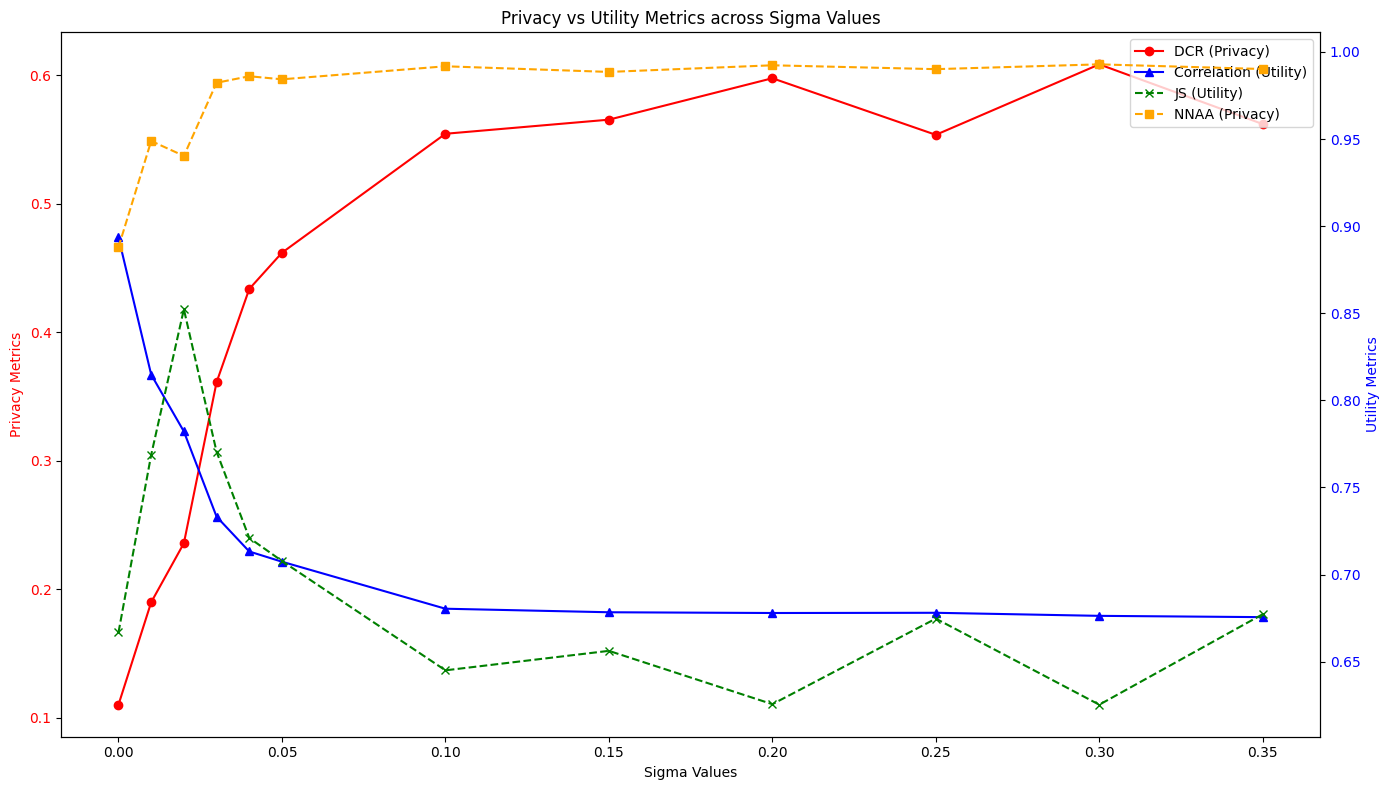

In [ ]:
import matplotlib.pyplot as plt

# Data set name (corresponding to sigma value)
datasets = df["sigma"]

# DCR
DCR = df["DCR"]
adversarial_accuracy = df["NNAA"]

# Correlation
correlation = df["Correlation"]
JS = df["JS"]

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Draw DCR
ax1.plot(datasets, DCR, marker='o', color='red', label="DCR (Privacy)", linestyle='-')
ax1.set_xlabel("Sigma Values")
ax1.set_ylabel("Privacy Metrics", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Draw Correlation
ax2 = ax1.twinx()
ax2.plot(datasets, correlation, marker='^', color='blue', label="Correlation (Utility)", linestyle='-')
ax2.plot(datasets, JS, marker='x', color='green', label="JS (Utility)", linestyle='--')
ax2.plot(datasets, adversarial_accuracy, marker='s', color='orange', label="NNAA (Privacy)", linestyle='--')
ax2.set_ylabel("Utility Metrics", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Add title and labels
plt.title("Privacy vs Utility Metrics across Sigma Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### remove

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator, AdversarialAccuracyCalculator_NN
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.disco import DisclosureCalculator

# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/abalone_number.csv")
original_name = "abalone"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/abalone_syn_data"

# Dictionary to store aggregated results
aggregated_results = defaultdict(lambda: defaultdict(list))

# Function to extract sigma value as float
def extract_sigma(file_name):
    match = re.search(r"sigma-(\d+)", file_name)
    if match:
        sigma_str = match.group(1)
        if len(sigma_str) == 1:  # Single digit like "1" -> "1"
            return int(sigma_str)
        elif len(sigma_str) == 2:  # Two digits like "05" -> "0.5"
            return int(sigma_str) / 10
        elif len(sigma_str) == 3:  # Three digits like "005" -> "0.05"
            return int(sigma_str) / 100
    return None


# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)
        # synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)
        synthetic_data = remove_rows_with_outliers(original_data, synthetic_data, file_name)
        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        # if 'Glucose' in synthetic_data.columns:
        #     synthetic_data['Glucose'] = synthetic_data['Glucose'].astype(int)
        # if 'BloodPressure' in synthetic_data.columns:
        #     synthetic_data['BloodPressure'] = synthetic_data['BloodPressure'].astype(int)
        for column in synthetic_data.columns:
            if column in original_data.columns:
                # Convert the column type in synthetic data to match the original data
                synthetic_data[column] = synthetic_data[column].astype(original_data[column].dtype)


        sigma = extract_sigma(file_name)
        if sigma is None:
            continue  # Skip files without a valid sigma value
        # print(f"\nProcessing synthetic dataset: {file_name} (sigma: {sigma})")

        # Utility Metric Calculation
        u = UtilityMetricManager()
        utility_metric_list = [
            BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        u.add_metric(utility_metric_list)
        results_utility = u.evaluate_all()

        # Privacy Metric Calculation
        p = PrivacyMetricManager()
        privacy_metric_list = [
            DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
            AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
        ]
        p.add_metric(privacy_metric_list)
        results_privacy = p.evaluate_all()

        # # DiSCO and repU
        diabetes_keys = ['sex', 'length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight']
        diabetes_target = 'rings'  # Usually Age is used as the target variable, but other variables may be selected depending on specific needs.

        calc = DisclosureCalculator(original_data, synthetic_data, keys=diabetes_keys, target=diabetes_target)
        repU, DiSCO = calc.evaluate()

        # Aggregate metrics
        for key, value in {**results_utility, **results_privacy}.items():
            aggregated_results[sigma][key].append(value)


        aggregated_results[sigma]["Disclosure_repU"].append(repU)
        aggregated_results[sigma]["Disclosure_DiSCO"].append(DiSCO)

# Calculate average metrics for each sigma
averaged_results = defaultdict(dict)
for sigma, metrics in aggregated_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):
            averaged_results[sigma][metric] = {k: np.mean([v[k] for v in values]) for k in values[0]}
        else:
            averaged_results[sigma][metric] = np.mean(values)

Under abalone-sigma-001.csv, removed 16 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 20.47it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7397 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-002.csv, removed 43 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 18.85it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7378 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-003.csv, removed 94 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.08it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7313 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-004.csv, removed 165 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 16.79it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7233 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-005.csv, removed 210 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 17.31it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 7189 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-010.csv, removed 257 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 22.05it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7030 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-015.csv, removed 263 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 21.33it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 29 rows and 6972 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-020.csv, removed 279 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 19.82it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 6860 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-025.csv, removed 258 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 22.72it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 6770 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 20.66it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 6732 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-035.csv, removed 287 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 21.50it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 6606 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Under abalone-sigma-0.csv, removed 1 rows with outliers.
Method CorrelationMethod.PEARSON was used.


100%|██████████| 4/4 [00:00<00:00, 25.76it/s]


Synthetic and original data checked with synorig.compare,
 looks like no adjustment needed


-------------------Synthesis 1--------------------


/content/drive/MyDrive/Colab Notebooks/synprivutil-main/privacy_utility_framework/privacy_utility_framework/metrics/privacy_metrics/distance/disco.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syndata[j][col] = syndata[j][col].astype('category')


Table for target rings from GT alone with keys has 28 rows and 4177 columns.
Table for target rings from GT & SD with all key combinations has 28 rows and 7430 columns.
IDENTITY: 
     UiO    UiS  UiOiS  repU
0  100.0  100.0    0.0   0.0
ATTRIBUTES: 
   Dorig   Dsyn   iS  DiS  DiSCO  DiSDiO  max_denom  mean_denom
0  100.0  100.0  0.0  0.0    0.0     0.0        0.0         NaN
~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~


In [ ]:
# Clean up averaged_results to extract metric names without file details
cleaned_results = defaultdict(dict)

for sigma, metrics in averaged_results.items():
    for metric, value in metrics.items():
        # Extract only the metric name, ignoring dataset/file info
        metric_name = metric.split("(")[0]
        if metric_name not in cleaned_results[sigma]:
            cleaned_results[sigma][metric_name] = []
        cleaned_results[sigma][metric_name].append(value)

# Aggregate and calculate average values for cleaned results
final_results = defaultdict(dict)
for sigma, metrics in cleaned_results.items():
    for metric, values in metrics.items():
        if isinstance(values[0], dict):  # If metric value is a dictionary
            # Average each key in the dictionary
            final_results[sigma][metric] = {k: sum(v[k] for v in values) / len(values) for k in values[0]}
        else:  # If metric value is a list of scalars
            final_results[sigma][metric] = sum(values) / len(values)

# Prepare data for plotting
data = {
    "sigma": sorted(final_results.keys()),
    "DCR": [final_results[sigma].get("DCRCalculator", None) for sigma in sorted(final_results.keys())],
    "NNDR": [final_results[sigma].get("NNDRCalculator", None) for sigma in sorted(final_results.keys())],
    # "AdversarialAccuracy": [final_results[sigma].get("AdversarialAccuracyCalculator", None) for sigma in sorted(final_results.keys())],
    "NNAA": [final_results[sigma].get("AdversarialAccuracyCalculator_NN", None) for sigma in sorted(final_results.keys())],
    "Correlation": [final_results[sigma].get("CorrelationCalculator", None) for sigma in sorted(final_results.keys())],
    "JS": [final_results[sigma].get("JSCalculator", None) for sigma in sorted(final_results.keys())],
    "repU": [final_results[sigma].get("Disclosure_repU", None) for sigma in sorted(final_results.keys())],
    "DiSCO": [final_results[sigma].get("Disclosure_DiSCO", None) for sigma in sorted(final_results.keys())],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Verify DataFrame content
print(df)


    sigma       DCR      NNDR      NNAA  Correlation        JS  repU  DiSCO
0    0.00  0.110267  0.870130  0.887873     0.893470  0.666735   0.0    0.0
1    0.01  0.189735  0.923870  0.948831     0.815469  0.769332   0.0    0.0
2    0.02  0.235699  0.948539  0.938937     0.782126  0.851949   0.0    0.0
3    0.03  0.361041  0.949561  0.981624     0.733617  0.770259   0.0    0.0
4    0.04  0.435635  0.959953  0.985123     0.713116  0.720241   0.0    0.0
5    0.05  0.464918  0.957984  0.983539     0.707839  0.705996   0.0    0.0
6    0.10  0.557168  0.957195  0.991754     0.680137  0.643304   0.0    0.0
7    0.15  0.570244  0.962454  0.987834     0.678353  0.652875   0.0    0.0
8    0.20  0.603357  0.971903  0.992493     0.678169  0.623214   0.0    0.0
9    0.25  0.558654  0.962622  0.989926     0.677878  0.672752   0.0    0.0
10   0.30  0.616315  0.970921  0.992911     0.676204  0.621654   0.0    0.0
11   0.35  0.565292  0.963052  0.989057     0.674977  0.675315   0.0    0.0


In [ ]:
# Extract BasicStatsCalculator's mean、median、var
basic_stats_data = {
    "sigma": [],
    "mean": [],
    "median": [],
    "var": []
}

for sigma, metrics in final_results.items():
    if "BasicStatsCalculator" in metrics:
        basic_stats = metrics["BasicStatsCalculator"]
        basic_stats_data["sigma"].append(sigma)
        basic_stats_data["mean"].append(basic_stats["mean"])
        basic_stats_data["median"].append(basic_stats["median"])
        basic_stats_data["var"].append(basic_stats["var"])

# Transfer to DataFrame
basic_stats_df = pd.DataFrame(basic_stats_data)

# Display
print(basic_stats_df)


    sigma      mean    median       var
0    0.01  0.070045  0.067062  0.011091
1    0.02  0.020864  0.028413  0.005703
2    0.03  0.042656  0.078185  0.023127
3    0.04  0.074117  0.088047  0.022306
4    0.05  0.084066  0.077844  0.024169
5    0.10  0.116712  0.152849  0.033415
6    0.15  0.116991  0.133777  0.032962
7    0.20  0.148434  0.170126  0.028471
8    0.25  0.127722  0.134421  0.027010
9    0.30  0.151480  0.169436  0.029102
10   0.35  0.127752  0.134955  0.027051
11   0.00  0.108531  0.098054  0.017057


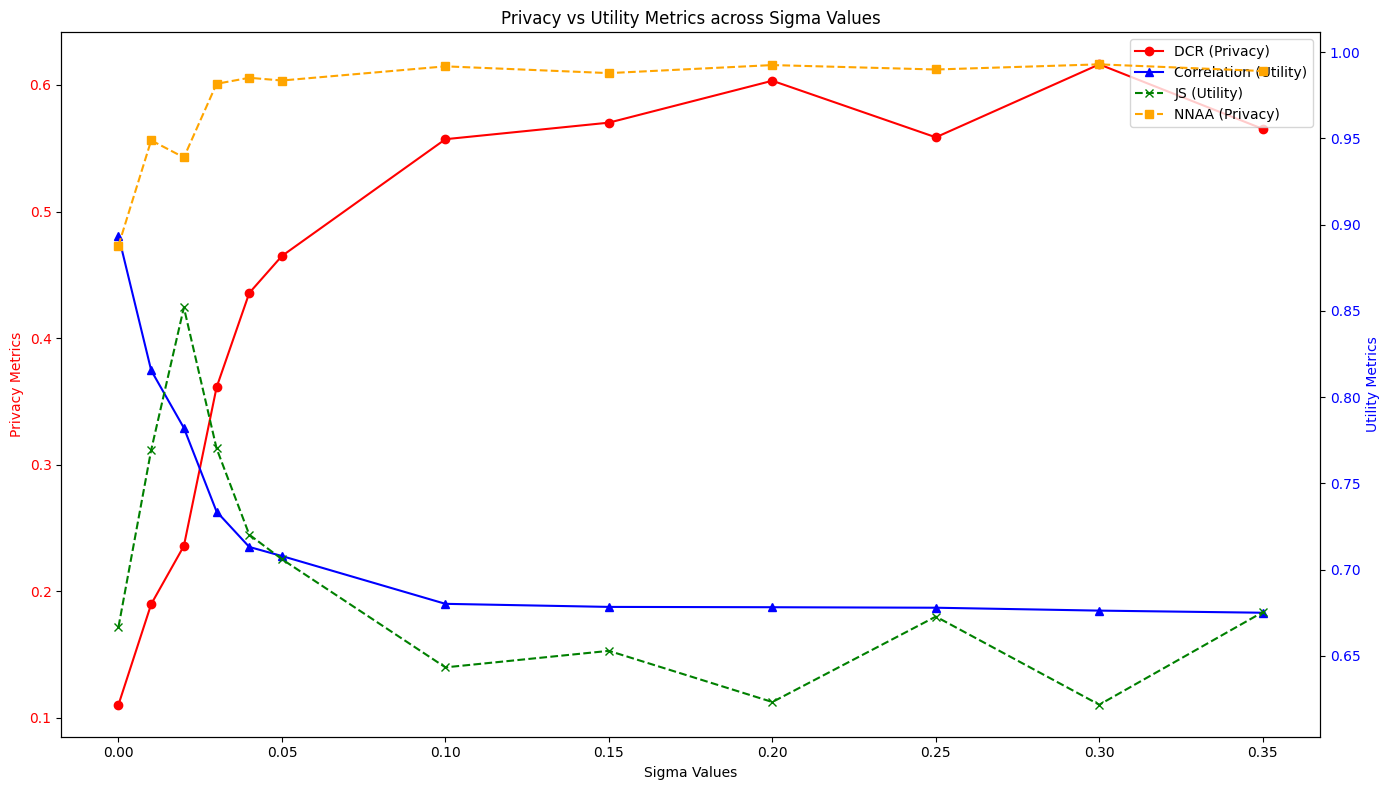

In [ ]:
import matplotlib.pyplot as plt

# Data set name (corresponding to sigma value)
datasets = df["sigma"]

# DCR
DCR = df["DCR"]
adversarial_accuracy = df["NNAA"]

# Correlation
correlation = df["Correlation"]
JS = df["JS"]

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Draw DCR
ax1.plot(datasets, DCR, marker='o', color='red', label="DCR (Privacy)", linestyle='-')
ax1.set_xlabel("Sigma Values")
ax1.set_ylabel("Privacy Metrics", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Draw Correlation
ax2 = ax1.twinx()
ax2.plot(datasets, correlation, marker='^', color='blue', label="Correlation (Utility)", linestyle='-')
ax2.plot(datasets, JS, marker='x', color='green', label="JS (Utility)", linestyle='--')
ax2.plot(datasets, adversarial_accuracy, marker='s', color='orange', label="NNAA (Privacy)", linestyle='--')
ax2.set_ylabel("Utility Metrics", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Add title and labels
plt.title("Privacy vs Utility Metrics across Sigma Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Comparison

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-002.csv, removed 43 rows with outliers.
Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-005.csv, removed 210 rows with outliers.
Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-020.csv, removed 279 rows with outliers.
Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

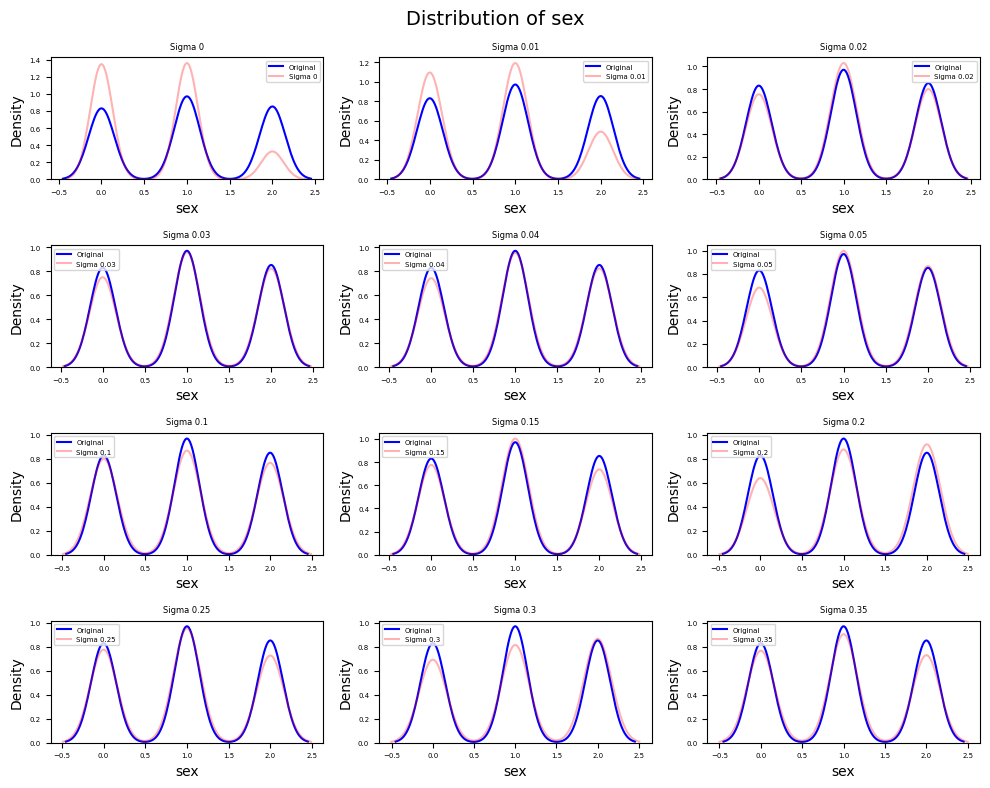

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-002.csv, removed 43 rows with outliers.
Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-005.csv, removed 210 rows with outliers.
Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-020.csv, removed 279 rows with outliers.
Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-035.csv, removed 287 rows with outliers.


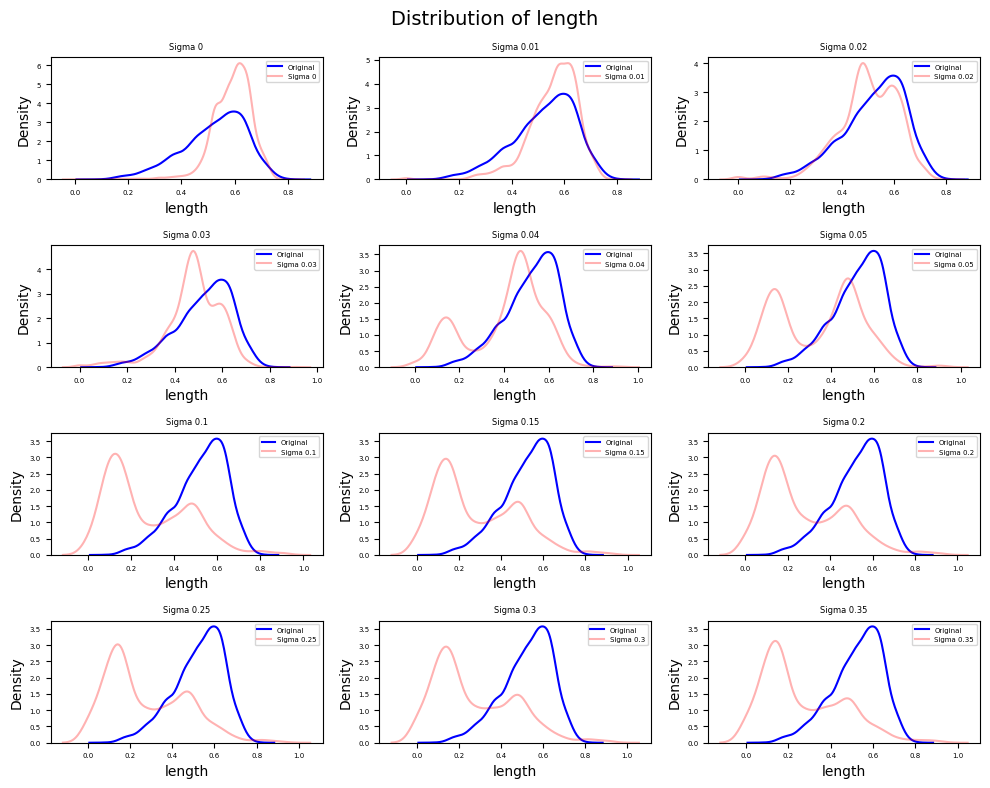

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.
Under abalone-sigma-002.csv, removed 43 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.
Under abalone-sigma-005.csv, removed 210 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.
Under abalone-sigma-020.csv, removed 279 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


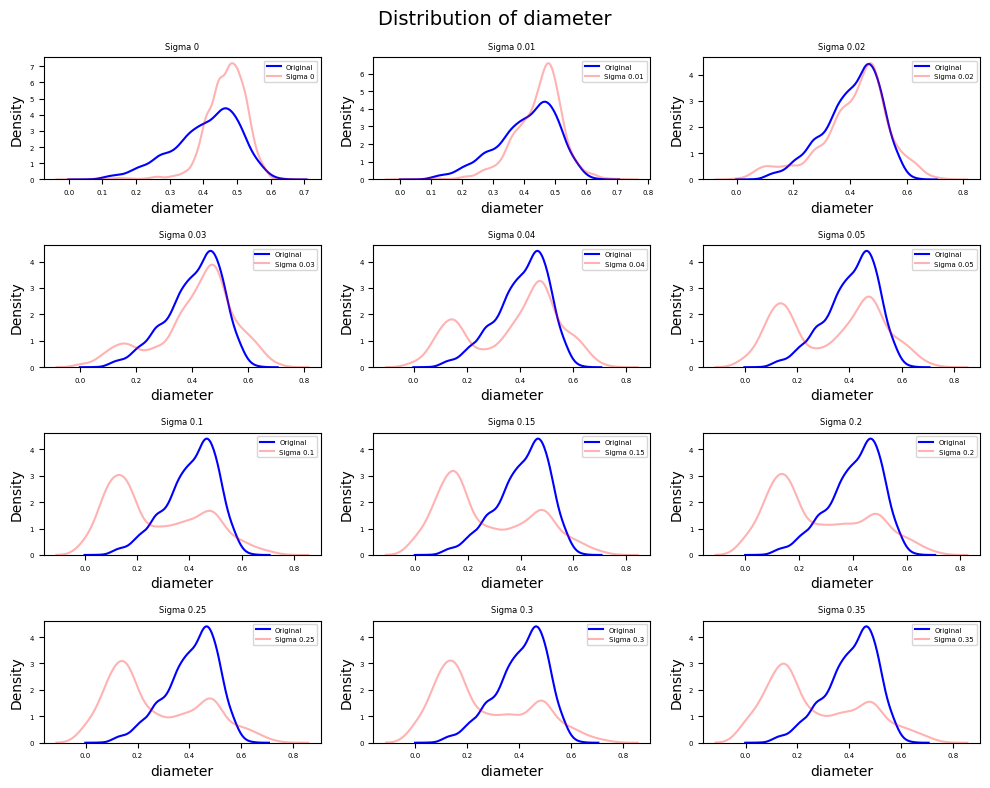

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.
Under abalone-sigma-002.csv, removed 43 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.
Under abalone-sigma-005.csv, removed 210 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.
Under abalone-sigma-020.csv, removed 279 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


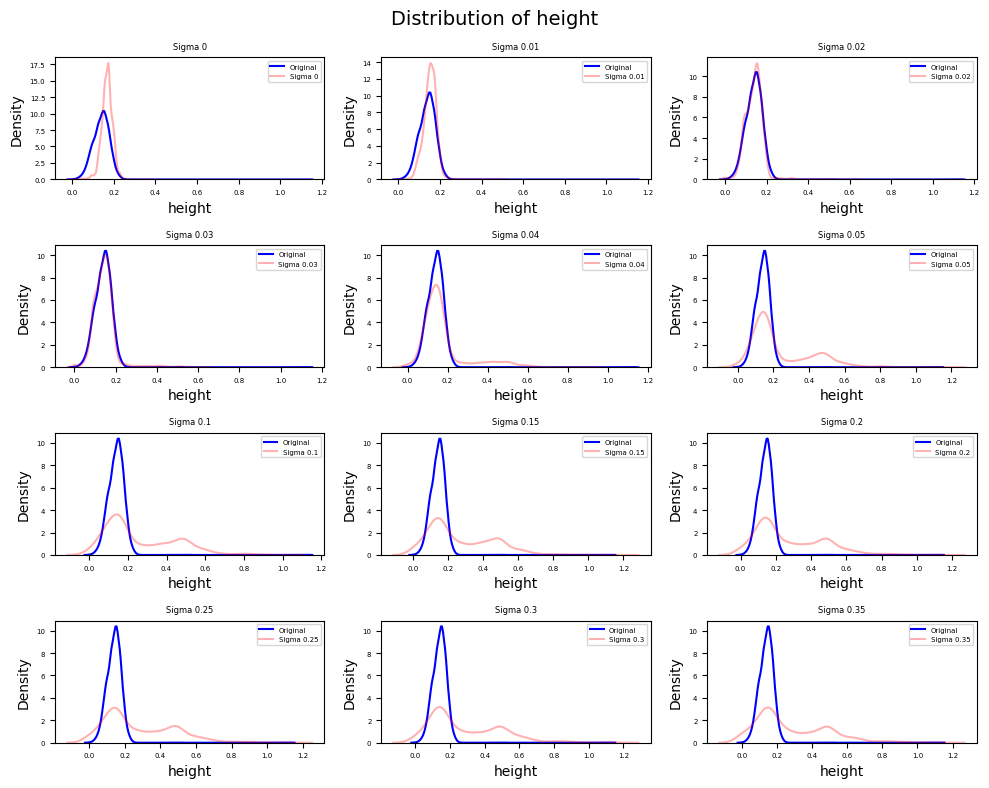

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.
Under abalone-sigma-002.csv, removed 43 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.
Under abalone-sigma-005.csv, removed 210 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.
Under abalone-sigma-020.csv, removed 279 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


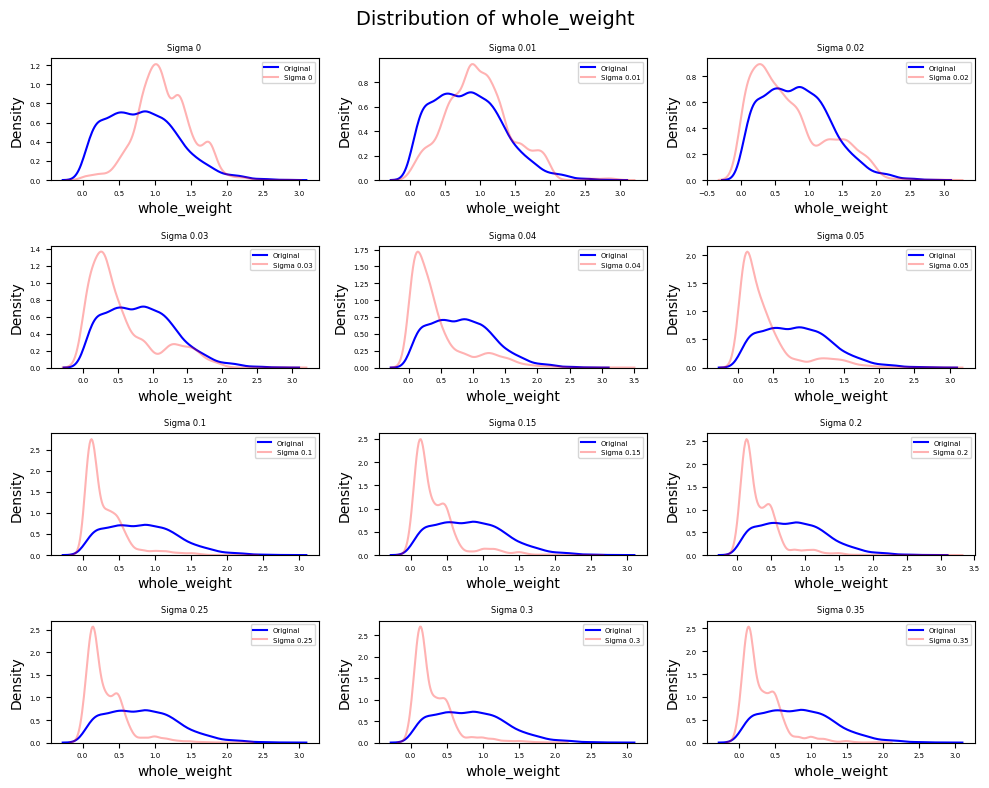

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-002.csv, removed 43 rows with outliers.
Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-005.csv, removed 210 rows with outliers.
Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-020.csv, removed 279 rows with outliers.
Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


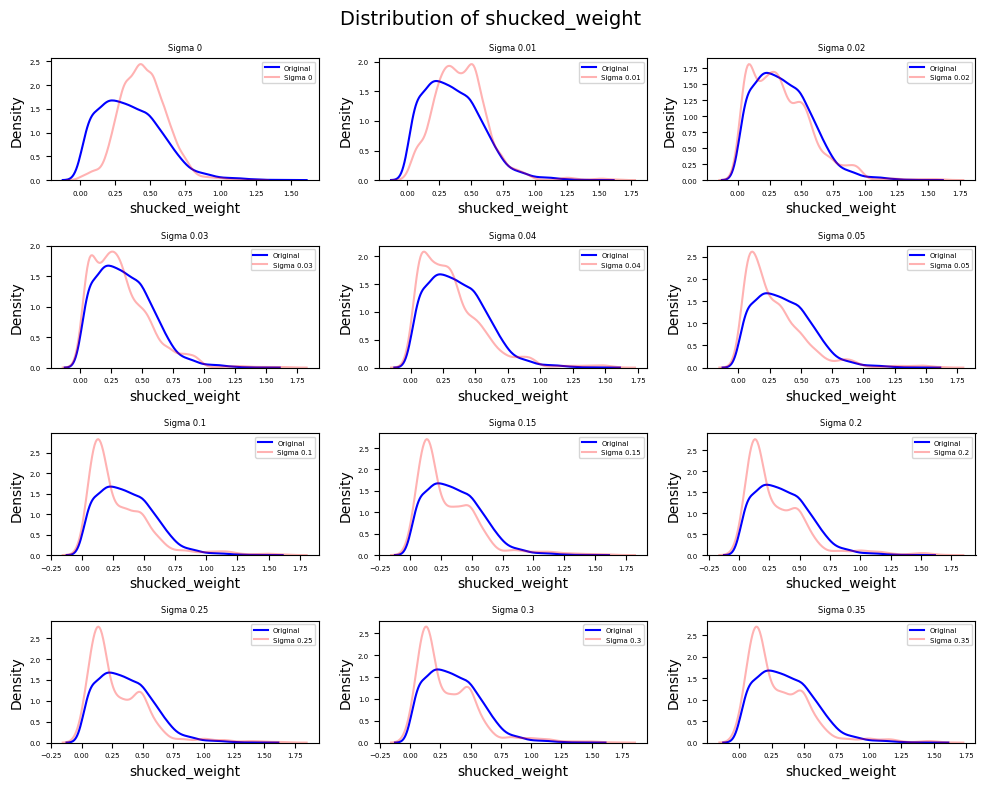

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.
Under abalone-sigma-002.csv, removed 43 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-003.csv, removed 94 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-004.csv, removed 165 rows with outliers.
Under abalone-sigma-005.csv, removed 210 rows with outliers.
Under abalone-sigma-010.csv, removed 257 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-015.csv, removed 263 rows with outliers.
Under abalone-sigma-020.csv, removed 279 rows with outliers.
Under abalone-sigma-025.csv, removed 258 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


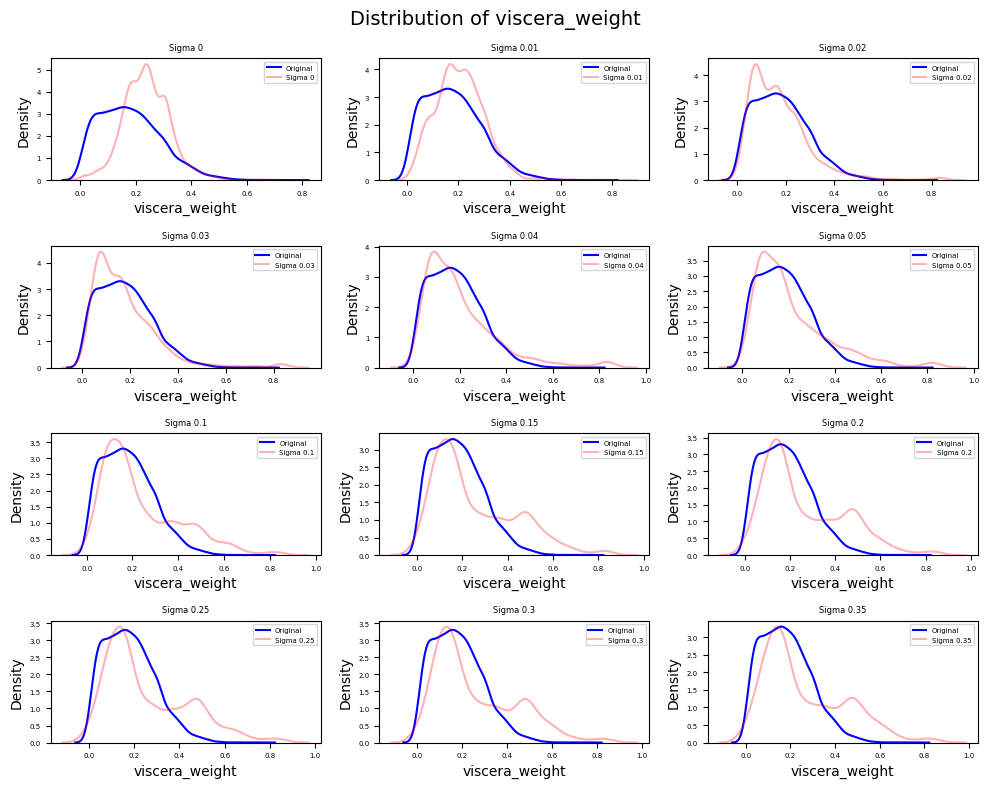

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.
Under abalone-sigma-002.csv, removed 43 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.
Under abalone-sigma-005.csv, removed 210 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.
Under abalone-sigma-020.csv, removed 279 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.
Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

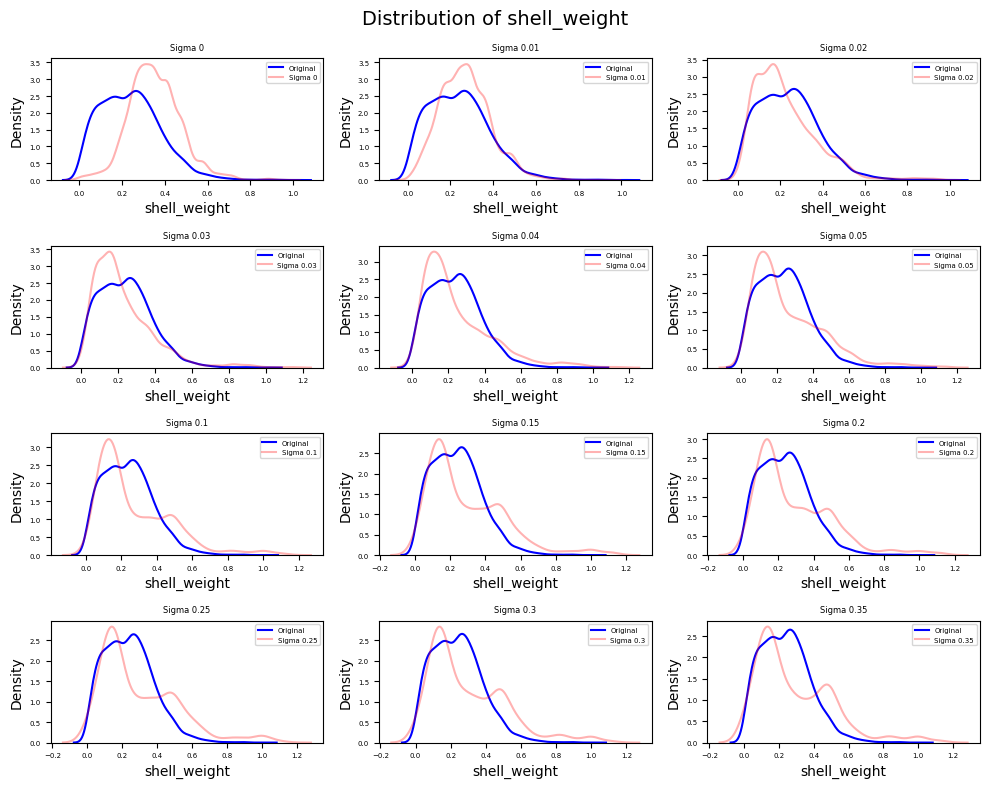

Under abalone-sigma-0.csv, removed 1 rows with outliers.
Under abalone-sigma-001.csv, removed 16 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-002.csv, removed 43 rows with outliers.
Under abalone-sigma-003.csv, removed 94 rows with outliers.
Under abalone-sigma-004.csv, removed 165 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-005.csv, removed 210 rows with outliers.
Under abalone-sigma-010.csv, removed 257 rows with outliers.
Under abalone-sigma-015.csv, removed 263 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-020.csv, removed 279 rows with outliers.
Under abalone-sigma-025.csv, removed 258 rows with outliers.
Under abalone-sigma-030.csv, removed 276 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Under abalone-sigma-035.csv, removed 287 rows with outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


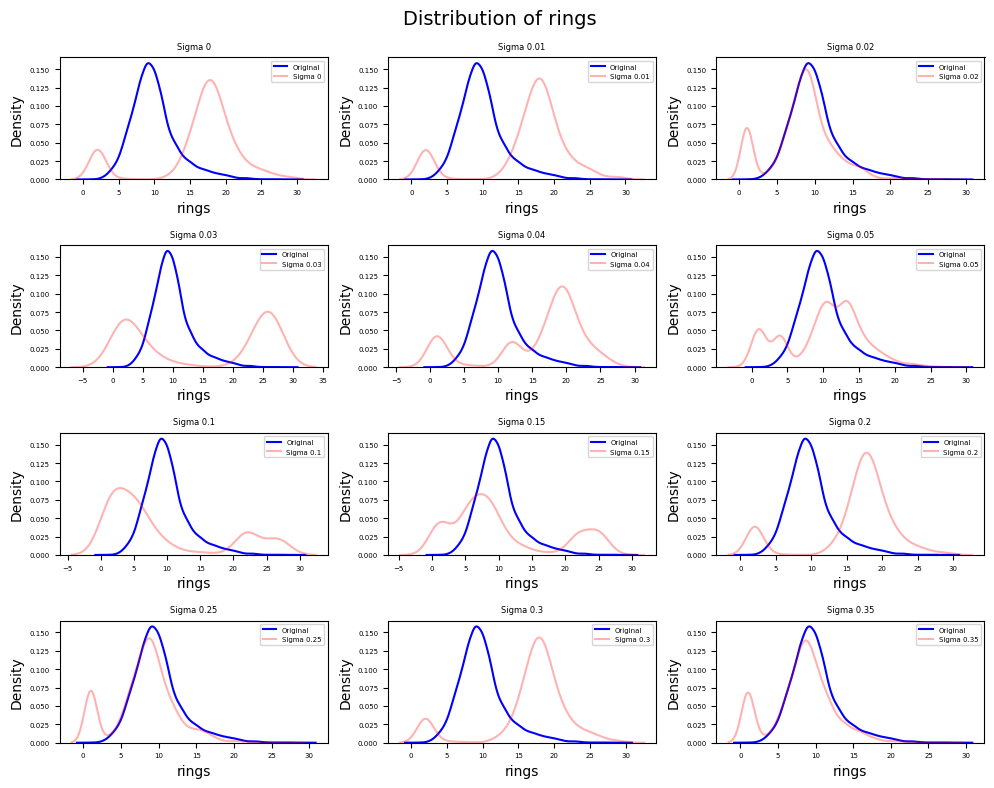

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_sigma(file_name):
    match = re.search(r"sigma-(\d+)", file_name)
    if match:
        sigma_str = match.group(1)
        if len(sigma_str) == 1:  # Single digit like "1" -> "1"
            return int(sigma_str)
        elif len(sigma_str) == 2:  # Two digits like "05" -> "0.5"
            return int(sigma_str) / 10
        elif len(sigma_str) == 3:  # Three digits like "005" -> "0.05"
            return int(sigma_str) / 100
    return None



def plot_comparison_for_each_column(original_data, synthetic_folder):
    """
    For each column, plot synthetic data with different sigma values against original data.
    """
    synthetic_files = [
        (file_name, extract_sigma(file_name))
        for file_name in os.listdir(synthetic_folder)
        if file_name.endswith(".csv") and extract_sigma(file_name) is not None
    ]

    # Sort files by sigma
    synthetic_files = sorted(synthetic_files, key=lambda x: x[1])

    # Iterate over each column
    for column in original_data.columns:
        # Adjust the number of rows and columns in the subplot grid
        num_files = len(synthetic_files)
        ncols = 3
        nrows = (num_files + ncols - 1) // ncols  # Ceiling division for rows

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 2 * nrows))

        # Flatten axes array for easy indexing
        axes = axes.flatten()

        for i, (file_name, sigma) in enumerate(synthetic_files):
            synthetic_path = os.path.join(synthetic_folder, file_name)
            synthetic_data = pd.read_csv(synthetic_path)
            # synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)
            synthetic_data = remove_rows_with_outliers(original_data, synthetic_data, file_name)
            # Plot original and synthetic distributions
            sns.kdeplot(original_data[column], ax=axes[i], label='Original', color='blue')
            if column in synthetic_data.columns:
                sns.kdeplot(synthetic_data[column], ax=axes[i], label=f'Sigma {sigma}', color='red', alpha=0.3)

            axes[i].set_title(f'Sigma {sigma}', fontsize=6)
            axes[i].legend(fontsize=5)
            axes[i].tick_params(axis='both', which='major', labelsize=5)

        # Hide unused subplots
        for j in range(len(synthetic_files), len(axes)):
            axes[j].axis('off')

        fig.suptitle(f'Distribution of {column}', fontsize=14)
        plt.tight_layout()
        plt.show()



# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/abalone_number.csv")

# Path to synthetic datasets folder
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/abalone_syn_data"

# Generate plots
plot_comparison_for_each_column(original_data, synthetic_folder)


## Graphs

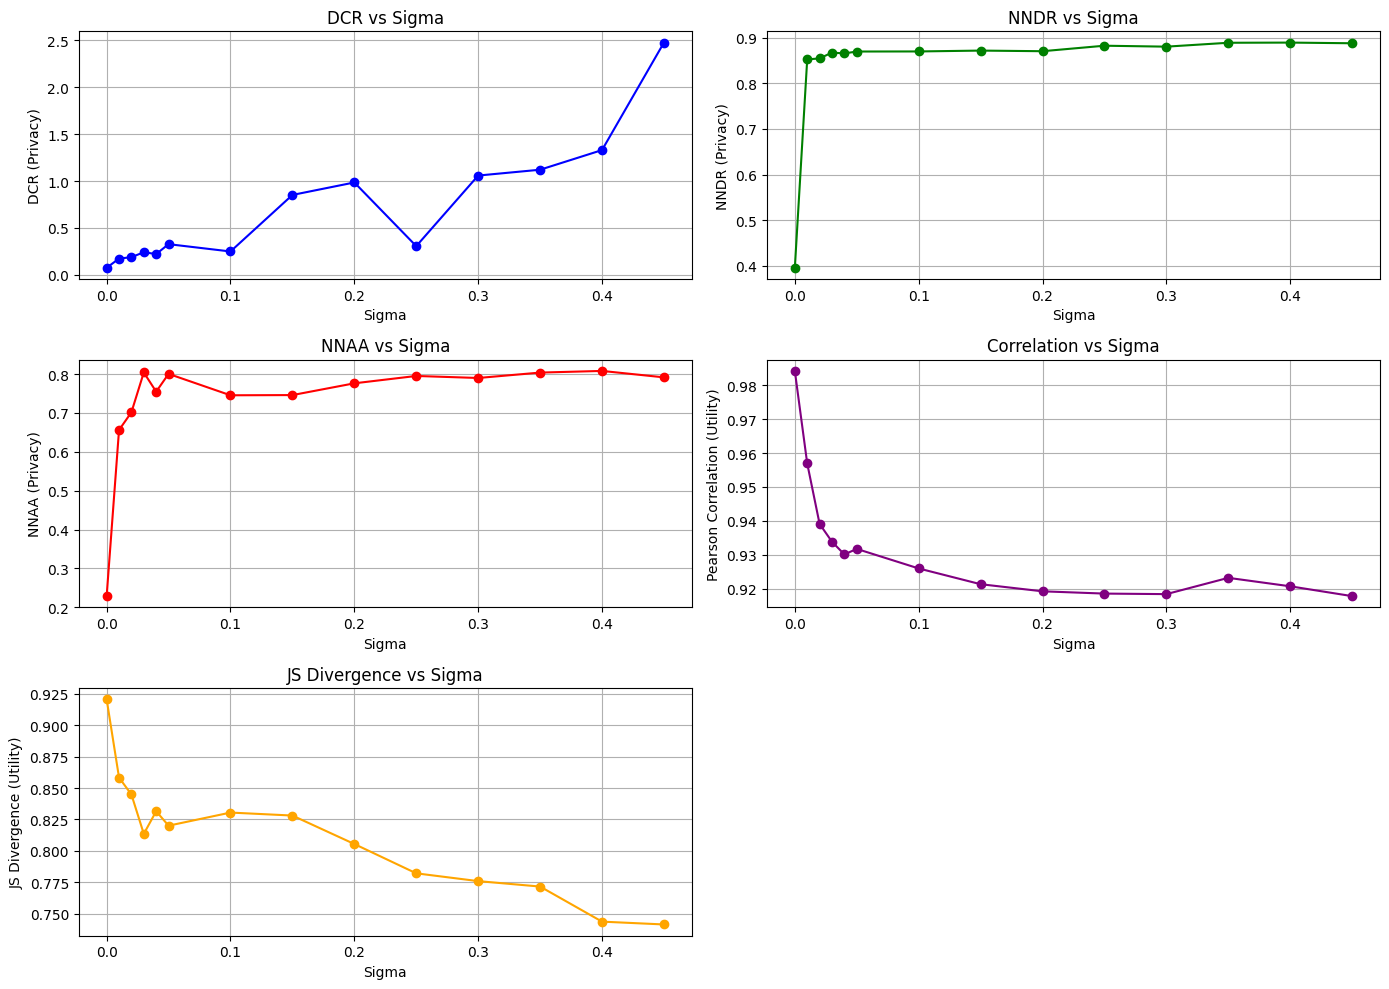

In [ ]:
plt.figure(figsize=(14, 10))

# Plot DCR
plt.subplot(3, 2, 1)
plt.plot(df["sigma"], df["DCR"], marker="o", color="b")
plt.xlabel("Sigma")
plt.ylabel("DCR (Privacy)")
plt.title("DCR vs Sigma")
plt.grid(True)

# Plot NNDR
plt.subplot(3, 2, 2)
plt.plot(df["sigma"], df["NNDR"], marker="o", color="g")
plt.xlabel("Sigma")
plt.ylabel("NNDR (Privacy)")
plt.title("NNDR vs Sigma")
plt.grid(True)

# Plot Adversarial Accuracy
plt.subplot(3, 2, 3)
plt.plot(df["sigma"], df["NNAA"], marker="o", color="r")
plt.xlabel("Sigma")
plt.ylabel("NNAA (Privacy)")
plt.title("NNAA vs Sigma")
plt.grid(True)

# Plot Correlation
plt.subplot(3, 2, 4)
plt.plot(df["sigma"], df["Correlation"], marker="o", color="purple")
plt.xlabel("Sigma")
plt.ylabel("Pearson Correlation (Utility)")
plt.title("Correlation vs Sigma")
plt.grid(True)

# Plot JS Divergence
plt.subplot(3, 2, 5)
plt.plot(df["sigma"], df["JS"], marker="o", color="orange")
plt.xlabel("Sigma")
plt.ylabel("JS Divergence (Utility)")
plt.title("JS Divergence vs Sigma")
plt.grid(True)

plt.tight_layout()
plt.show()

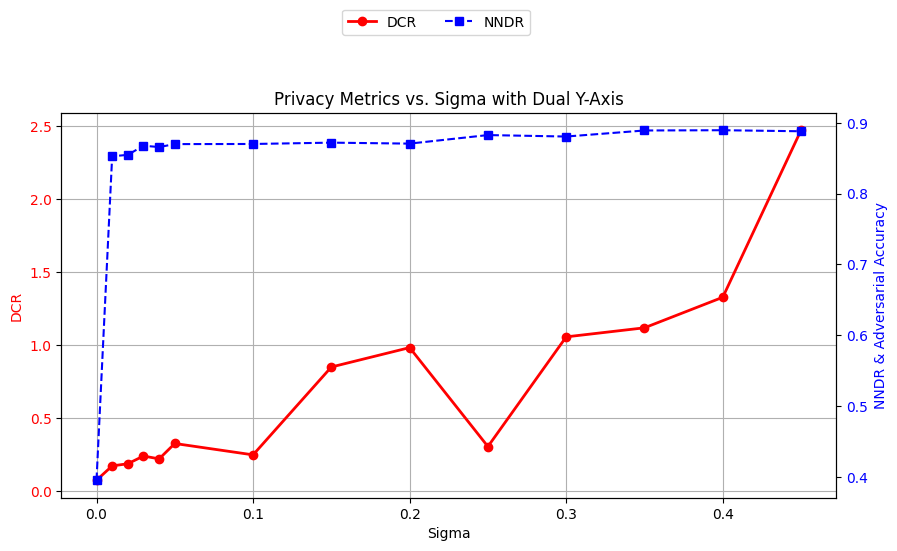

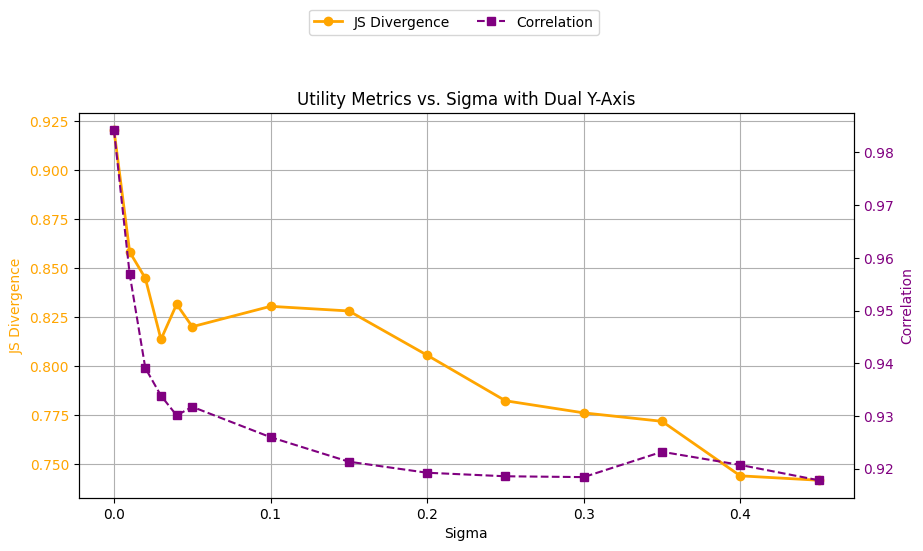

In [ ]:
# Privacy Metrics Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot DCR on the first y-axis
ax1.plot(df["sigma"], df["DCR"], label="DCR", marker='o', linestyle='-', color='red', linewidth=2)
ax1.set_xlabel("Sigma")
ax1.set_ylabel("DCR", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True)

# Create a second y-axis for NNDR and Adversarial Accuracy
ax2 = ax1.twinx()
ax2.plot(df["sigma"], df["NNDR"], label="NNDR", marker='s', linestyle='--', color='blue')
# ax2.plot(df["sigma"], df["AdversarialAccuracy"], label="Adversarial Accuracy", marker='^', linestyle='-.', color='green')
ax2.set_ylabel("NNDR & Adversarial Accuracy", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends for both axes
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.title("Privacy Metrics vs. Sigma with Dual Y-Axis")
plt.show()

# Utility Metrics Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot JS Divergence on the first y-axis
ax1.plot(df["sigma"], df["JS"], label="JS Divergence", marker='o', linestyle='-', color='orange', linewidth=2)
ax1.set_xlabel("Sigma")
ax1.set_ylabel("JS Divergence", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True)

# Create a second y-axis for Correlation
ax2 = ax1.twinx()
ax2.plot(df["sigma"], df["Correlation"], label="Correlation", marker='s', linestyle='--', color='purple')
ax2.set_ylabel("Correlation", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add legends for both axes
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.title("Utility Metrics vs. Sigma with Dual Y-Axis")
plt.show()


In [ ]:
### Trials for different sigma (noise multiplier)


import os
import pandas as pd
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.wasserstein import WassersteinCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator, AdversarialAccuracyCalculator_NN
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator

# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/Insurance_compressed.csv")
original_name = "Insurance"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/evaluation/sigma"

# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)

        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        if 'age' in synthetic_data.columns:
            synthetic_data['age'] = synthetic_data['age'].astype(int)

        synthetic_name = file_name.split(".")[0]  # Use file name as synthetic dataset identifier

        print(f"\nProcessing synthetic dataset: {synthetic_name}")

        # Initialize UtilityMetricManager and define utility metrics
        u = UtilityMetricManager()
        utility_metric_list = [
            BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
        ]
        u.add_metric(utility_metric_list)
        results_utility = u.evaluate_all()

        # Print utility metric results
        print("\nUtility Metric Results:")
        for key, value in results_utility.items():
            print(f"{key}: {value}")

        # Initialize PrivacyMetricManager and define privacy metrics
        p = PrivacyMetricManager()
        privacy_metric_list = [
            DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name)
        ]
        p.add_metric(privacy_metric_list)
        results_privacy = p.evaluate_all()

        # Print privacy metric results
        print("\nPrivacy Metric Results:")
        for key, value in results_privacy.items():
            print(f"{key}: {value}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/evaluation/sigma'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reorganise the data in sigma order
data = {
    "sigma": [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05],
    "DCR": [0.4756, 0.1845, 0.1719, 0.1936, 0.1892, 1.3297, 1.3615, 0.1940, 1.0313, 0.3305, 5.5271],
    "NNDR": [0.7411, 0.7880, 0.7897, 0.8093, 0.8242, 0.8010, 0.8147, 0.8124, 0.8097, 0.8598, 0.8223],
    "AdversarialAccuracy": [0.8621, 0.9376, 0.9376, 0.9615, 0.9544, 0.9458, 0.9488, 0.9634, 0.9652, 0.9697, 0.9626],
    "Correlation": [0.9661, 0.9422, 0.9401, 0.9431, 0.9354, 0.9428, 0.9266, 0.9281, 0.9417, 0.9410, 0.9238],
    "JS": [0.9162, 0.9096, 0.9080, 0.9070, 0.8802, 0.8824, 0.8769, 0.8886, 0.8783, 0.8478, 0.8405]
}

# Transfer to DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(14, 10))

# Plot DCR
plt.subplot(3, 2, 1)
plt.plot(df["sigma"], df["DCR"], marker='o', color='b')
plt.xlabel("Sigma")
plt.ylabel("DCR (Privacy)")
plt.title("DCR vs Sigma")
plt.grid(True)

# Plot NNDR
plt.subplot(3, 2, 2)
plt.plot(df["sigma"], df["NNDR"], marker='o', color='g')
plt.xlabel("Sigma")
plt.ylabel("NNDR (Privacy)")
plt.title("NNDR vs Sigma")
plt.grid(True)

# Plot Adversarial Accuracy
plt.subplot(3, 2, 3)
plt.plot(df["sigma"], df["AdversarialAccuracy"], marker='o', color='r')
plt.xlabel("Sigma")
plt.ylabel("Adversarial Accuracy (Privacy)")
plt.title("Adversarial Accuracy vs Sigma")
plt.grid(True)

# Plot Correlation
plt.subplot(3, 2, 4)
plt.plot(df["sigma"], df["Correlation"], marker='o', color='purple')
plt.xlabel("Sigma")
plt.ylabel("Pearson Correlation (Utility)")
plt.title("Correlation vs Sigma")
plt.grid(True)

# Plot JS
plt.subplot(3, 2, 5)
plt.plot(df["sigma"], df["JS"], marker='o', color='orange')
plt.xlabel("Sigma")
plt.ylabel("JS Divergence (Utility)")
plt.title("JS Divergence vs Sigma")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigma 
datasets = ["0.001", "0.005", "0.01", "0.02", "0.015", "0.025", "0.03", "0.035", "0.04", "0.045", "0.05"]
DCR = [0.4756, 0.1845, 0.1720, 0.1892, 0.1936, 1.3297, 1.3615, 0.1940, 1.0313, 0.3305, 5.5271]
NNDR = [0.7411, 0.7880, 0.7897, 0.8242, 0.8093, 0.8010, 0.8147, 0.8124, 0.8097, 0.8598, 0.8223]
adversarial_accuracy = [0.8621, 0.9376, 0.9376, 0.9544, 0.9615, 0.9458, 0.9488, 0.9634, 0.9652, 0.9697, 0.9626]
correlation = [0.9661, 0.9422, 0.9401, 0.9354, 0.9431, 0.9428, 0.9266, 0.9281, 0.9417, 0.9410, 0.9238]
JS = [0.9162, 0.9096, 0.9080, 0.8802, 0.9070, 0.8824, 0.8769, 0.8886, 0.8783, 0.8478, 0.8405]

# Set bar width and position
n_groups = len(datasets)
bar_width = 0.15
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
plt.bar(index, DCR, bar_width, label="DCR")
plt.bar(index + bar_width, NNDR, bar_width, label="NNDR")
plt.bar(index + 2 * bar_width, adversarial_accuracy, bar_width, label="Adversarial Accuracy")
plt.bar(index + 3 * bar_width, correlation, bar_width, label="Correlation (Utility)")
plt.bar(index + 4 * bar_width, JS, bar_width, label="JS")

# Set labels
plt.xlabel("Synthetic Dataset (Sigma Values)")
plt.ylabel("Metric Value")
plt.title("Privacy and Utility Metrics Comparison across Sigma Values")
plt.xticks(index + 2 * bar_width, datasets, rotation=45)
plt.legend()
plt.tight_layout()

# Display
plt.show()


In [ ]:
### Trials for different learning rate
### Individual comparisons

import os
import pandas as pd
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.wasserstein import WassersteinCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator

# Load original dataset
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/Insurance_compressed.csv")
original_name = "Insurance"

# Directory containing synthetic datasets
synthetic_folder = "/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/evaluation/lr"

# Loop through each synthetic file and perform calculations
for file_name in os.listdir(synthetic_folder):
    if file_name.endswith(".csv"):
        synthetic_path = os.path.join(synthetic_folder, file_name)
        synthetic_data = pd.read_csv(synthetic_path)

        # Ensure correct data types (e.g., convert 'age' column to int if needed)
        if 'age' in synthetic_data.columns:
            synthetic_data['age'] = synthetic_data['age'].astype(int)

        synthetic_name = file_name.split(".")[0]  # Use file name as synthetic dataset identifier

        print(f"\nProcessing synthetic dataset: {synthetic_name}")

        # Initialize UtilityMetricManager and define utility metrics
        u = UtilityMetricManager()
        utility_metric_list = [
            BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
        ]
        u.add_metric(utility_metric_list)
        results_utility = u.evaluate_all()

        # Print utility metric results
        print("\nUtility Metric Results:")
        for key, value in results_utility.items():
            print(f"{key}: {value}")

        # Initialize PrivacyMetricManager and define privacy metrics
        p = PrivacyMetricManager()
        privacy_metric_list = [
            DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name),
            AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=synthetic_name)
        ]
        p.add_metric(privacy_metric_list)
        results_privacy = p.evaluate_all()

        # Print privacy metric results
        print("\nPrivacy Metric Results:")
        for key, value in results_privacy.items():
            print(f"{key}: {value}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Setting data (please list lr values in descending order)
learning_rates = ["1e-5", "8e-5", "9e-5", "1e-4", "2e-4"]
DCR = [0.1283, 0.1738, 0.1644, 0.1558, 0.1594]
NNDR = [0.7172, 0.8010, 0.7883, 0.7789, 0.7870]
adversarial_accuracy = [0.9918, 0.9312, 0.9294, 0.9327, 0.9436]
correlation = [0.8897, 0.9393, 0.9442, 0.9467, 0.9500]
JS = [0.7339, 0.8938, 0.8947, 0.8935, 0.9074]

# Set bar width and position
bar_width = 0.15
index = np.arange(len(learning_rates))

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bars
ax1.bar(index, DCR, bar_width, label="DCR (Privacy)", color='red')
ax1.bar(index + bar_width, NNDR, bar_width, label="NNDR (Privacy)", color='orange')
ax1.bar(index + 2 * bar_width, adversarial_accuracy, bar_width, label="Adversarial Accuracy (Privacy)", color='purple')
ax1.bar(index + 3 * bar_width, correlation, bar_width, label="Correlation (Utility)", color='blue')
ax1.bar(index + 4 * bar_width, JS, bar_width, label="JS (Utility)", color='green')

# Add labels
plt.xlabel("Learning Rate (lr) Values")
plt.ylabel("Metric Value")
plt.title("Privacy and Utility Metrics across Learning Rate Values")
plt.xticks(index + 2 * bar_width, learning_rates)
plt.legend()
plt.tight_layout()

# display
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "lr": [1e-5, 8e-5, 9e-5, 1e-4, 2e-4, 5e-4, 1e-3],
    "DCR": [0.1283, 0.1738, 0.1644, 0.1558, 0.1594, 0.1719, 1.6152],
    "NNDR": [0.7172, 0.8010, 0.7883, 0.7789, 0.7870, 0.7897, 0.8148],
    "AdversarialAccuracy": [0.9918, 0.9312, 0.9294, 0.9327, 0.9436, 0.9376, 0.9492],
    "Correlation": [0.8897, 0.9393, 0.9442, 0.9467, 0.9500, 0.9401, 0.9400],
    "JS": [0.7339, 0.8938, 0.8947, 0.8935, 0.9074, 0.9080, 0.8879]
}

# Transfer to DataFrame
df = pd.DataFrame(data)

# Sed up the plot
plt.figure(figsize=(14, 10))

# DCR (Privacy)
plt.subplot(3, 2, 1)
plt.plot(df["lr"], df["DCR"], marker='o', color='b')
plt.xlabel("Learning Rate (lr)")
plt.ylabel("DCR (Privacy)")
plt.title("DCR vs Learning Rate")
plt.xscale("log")
plt.grid(True)

# NNDR (Privacy)
plt.subplot(3, 2, 2)
plt.plot(df["lr"], df["NNDR"], marker='o', color='g')
plt.xlabel("Learning Rate (lr)")
plt.ylabel("NNDR (Privacy)")
plt.title("NNDR vs Learning Rate")
plt.xscale("log")
plt.grid(True)

# Adversarial Accuracy (Privacy)
plt.subplot(3, 2, 3)
plt.plot(df["lr"], df["AdversarialAccuracy"], marker='o', color='r')
plt.xlabel("Learning Rate (lr)")
plt.ylabel("Adversarial Accuracy (Privacy)")
plt.title("Adversarial Accuracy vs Learning Rate")
plt.xscale("log")
plt.grid(True)

# Pearson Correlation (Utility)
plt.subplot(3, 2, 4)
plt.plot(df["lr"], df["Correlation"], marker='o', color='purple')
plt.xlabel("Learning Rate (lr)")
plt.ylabel("Pearson Correlation (Utility)")
plt.title("Correlation vs Learning Rate")
plt.xscale("log")
plt.grid(True)

# JS Divergence (Utility)
plt.subplot(3, 2, 5)
plt.plot(df["lr"], df["JS"], marker='o', color='orange')
plt.xlabel("Learning Rate (lr)")
plt.ylabel("JS Divergence (Utility)")
plt.title("JS Divergence vs Learning Rate")
plt.xscale("log")
plt.grid(True)

# 调整布局
plt.tight_layout()
plt.show()


## Plot

In [ ]:
import pandas as pd
from privacy_utility_framework.privacy_utility_framework.plots.plots import plot_original_vs_synthetic

# Load data
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/diabetes.csv")
synthetic_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/diabetes_syn_data/diabetes-sigma-030.csv")


# Display the original and synthetic data
a = calculate_ml_utility_rf_linked_improved(original_data, synthetic_data, target_column="Outcome")
print(a)
plot_original_vs_synthetic(original_data, synthetic_data)


## Check

In [ ]:
import pandas as pd
file_path_duplicates_retry = '/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/diabetes_syn_data/diabetes-sigma-035.csv'
data_duplicates_retry = pd.read_csv(file_path_duplicates_retry)

print(data_duplicates_retry.shape[0])
# Remove duplicates
data_no_duplicates_retry = data_duplicates_retry.drop_duplicates()

# Count the remaining rows
remaining_rows_retry = data_no_duplicates_retry.shape[0]
remaining_rows_retry

In [ ]:
import pandas as pd
from privacy_utility_framework.privacy_utility_framework.plots.plots import plot_original_vs_synthetic

# Load data
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/Real_Datasets/Insurance_compressed.csv")
synthetic_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tabula-main-claude/insurance_syn_data/insurance-sigma-015.csv")

synthetic_data = replace_outliers_with_mean(original_data, synthetic_data)

if 'age' in synthetic_data.columns:
            synthetic_data['age'] = synthetic_data['age'].astype(int)

a = calculate_ml_utility_rf_linked_improved(original_data, synthetic_data, target_column="charges")
print(a)
plot_original_vs_synthetic(original_data, synthetic_data)


In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.utility_metric_manager import UtilityMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.basic_stats import BasicStatsCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.mutual_information import MICalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.correlation import CorrelationCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.utility_metrics.statistical.js_similarity import JSCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.privacy_metric_manager import PrivacyMetricManager
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.adversarial_accuracy_class import AdversarialAccuracyCalculator, AdversarialAccuracyCalculator_NN
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.dcr_class import DCRCalculator
from privacy_utility_framework.privacy_utility_framework.metrics.privacy_metrics.distance.nndr_class import NNDRCalculator

original_name = "insurance"
file_name="tabula"
u = UtilityMetricManager()
utility_metric_list = [
    BasicStatsCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    MICalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    CorrelationCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    JSCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
]
u.add_metric(utility_metric_list)
results_utility = u.evaluate_all()

# Privacy Metric Calculation
p = PrivacyMetricManager()
privacy_metric_list = [
    DCRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    NNDRCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    AdversarialAccuracyCalculator_NN(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
    AdversarialAccuracyCalculator(original_data, synthetic_data, original_name=original_name, synthetic_name=file_name),
]
p.add_metric(privacy_metric_list)
results_privacy = p.evaluate_all()


print("\nUtility Metric Results:")
for key, value in results_utility.items():
    print(f"{key}: {value}")

print("\nPrivacy Metric Results:")
for key, value in results_privacy.items():
    print(f"{key}: {value}")